In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'
from PIL import Image
import statsmodels.api as sm
import seaborn as sns
sns.set_context("poster")
sns.set_style('darkgrid')
#context_lst = ["paper", "notebook", "talk", "poster"]
import datetime

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
AAFremoved = pd.read_csv("merged_analysis_result170104_231839.csv", encoding="shift-jis")
#ベースラインより下がったピークは考慮しない
AAFremoved["Max Response (%)"] = AAFremoved["p_max"].apply(lambda F: F if F>0 else 0)

#p_peak_appearedは正規ピークの目視判定結果
#ピークは有るものの誤ったピークframeを拾っている場合はp_remarkに文字が書き込まれているため、
#これを正しく判定したはずの解析結果ではこのフラグを書き換えた列を追加する
AAFremoved["p_peak_appeared_repaired"] = AAFremoved["p_remark"].apply(lambda data: isinstance(data, str)) | AAFremoved["p_peak_appeared"]

AAFremoved["p_max"] = AAFremoved["Max Response (%)"]
AAFremoved["Stimulation Voltage (V)"] = AAFremoved["voltage"]
AAFremoved["Peak Latency (s)"] = AAFremoved["p_peak_latency"]
AAFremoved["duration (s)"] = AAFremoved["p_duration"]

Ref = pd.read_csv("./../../SoundResponseReference/analysis_result161227_110603.csv", encoding="shift-jis")

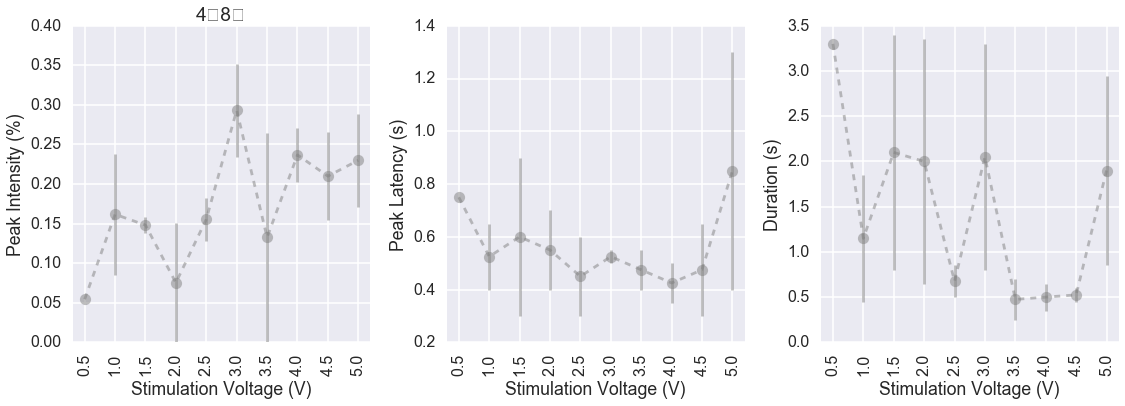

In [3]:
date_list = ["4月8日"]
plt.figure(figsize=(16,6))

for date in date_list:
    tmp = None
    tmp = AAFremoved[AAFremoved["date"]==date]
    
    plt.subplot(131)
    tmp_MaxResponse_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50")["Max Response (%)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_MaxResponse_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_MaxResponse_f.std()/np.sqrt(tmp_MaxResponse_f.count()))

    plt.subplot(132)
    tmp_latency_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50")["Peak Latency (s)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_latency_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_latency_f.std()/np.sqrt(tmp_latency_f.count()))

    plt.subplot(133)
    tmp_duration_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50")["duration (s)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_duration_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_duration_f.std()/np.sqrt(tmp_duration_f.count()))


plt.subplot(131)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Intensity (%)")
plt.title(date)

plt.subplot(132)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Latency (s)")

plt.subplot(133)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Duration (s)")

plt.tight_layout()

plt.savefig("merged-0408-v01-8f50.png", dpi=300)

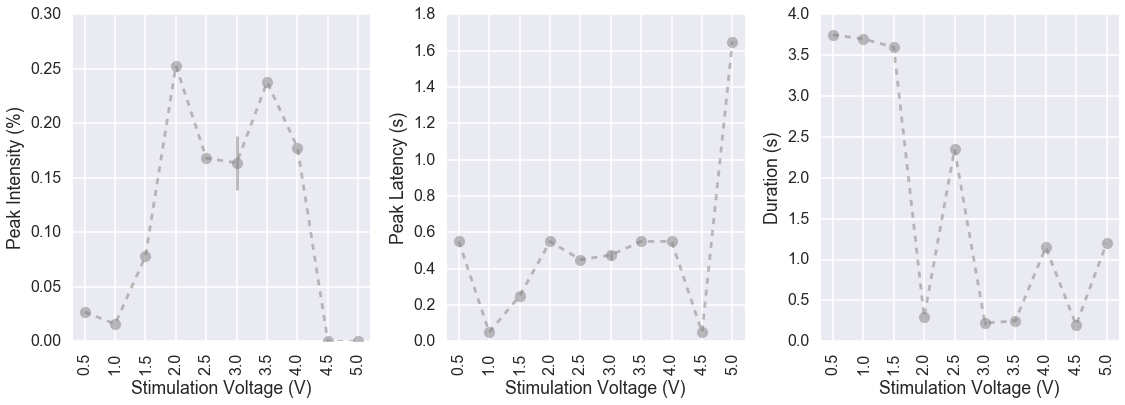

In [4]:
date_list = ["5月10日"]
plt.figure(figsize=(16,6))

for date in date_list:
    tmp = None
    tmp = AAFremoved[AAFremoved["date"]==date]
    
    plt.subplot(131)
    tmp_MaxResponse_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50")["Max Response (%)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_MaxResponse_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_MaxResponse_f.std()/np.sqrt(tmp_MaxResponse_f.count()))

    plt.subplot(132)
    tmp_latency_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50")["Peak Latency (s)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_latency_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_latency_f.std()/np.sqrt(tmp_latency_f.count()))

    plt.subplot(133)
    tmp_duration_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50")["duration (s)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_duration_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_duration_f.std()/np.sqrt(tmp_duration_f.count()))


plt.subplot(131)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Intensity (%)")

plt.subplot(132)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Latency (s)")

plt.subplot(133)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Duration (s)")

plt.tight_layout()
plt.savefig("merged-0510-v01-8f50.png", dpi=300)

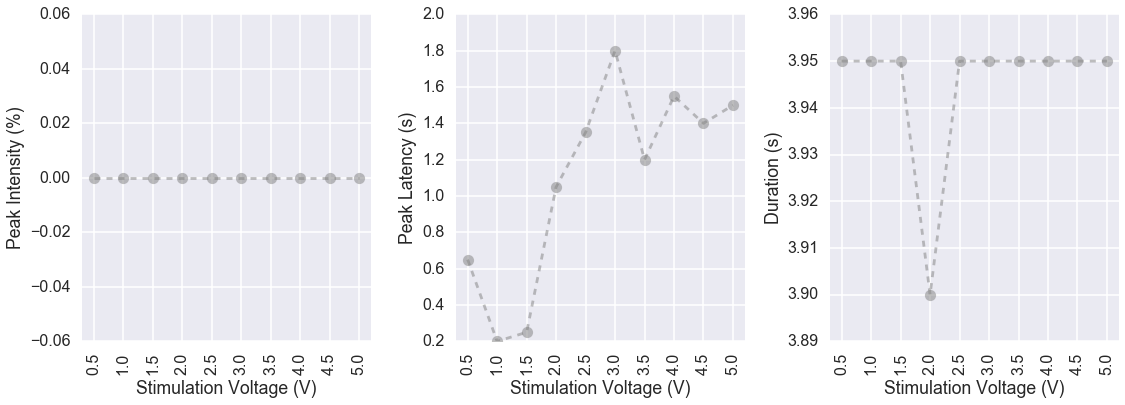

In [5]:
date_list = ["5月24日"]
plt.figure(figsize=(16,6))

for date in date_list:
    tmp = None
    tmp = AAFremoved[AAFremoved["date"]==date]
    
    plt.subplot(131)
    tmp_MaxResponse_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50")["Max Response (%)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_MaxResponse_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_MaxResponse_f.std()/np.sqrt(tmp_MaxResponse_f.count()))

    plt.subplot(132)
    tmp_latency_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50")["Peak Latency (s)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_latency_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_latency_f.std()/np.sqrt(tmp_latency_f.count()))

    plt.subplot(133)
    tmp_duration_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50")["duration (s)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_duration_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_duration_f.std()/np.sqrt(tmp_duration_f.count()))


plt.subplot(131)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Intensity (%)")

plt.subplot(132)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Latency (s)")

plt.subplot(133)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Duration (s)")

plt.tight_layout()
plt.savefig("merged-0524-v01-8f50.png", dpi=300)

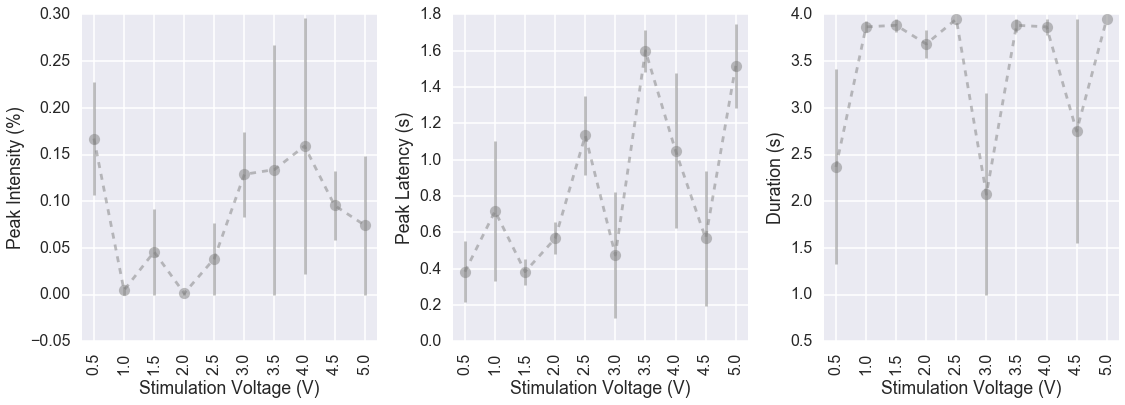

In [6]:
date_list = ["8月2日"]
plt.figure(figsize=(16,6))

for date in date_list:
    tmp = None
    tmp = AAFremoved[AAFremoved["date"]==date]
    
    plt.subplot(131)
    tmp_MaxResponse_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50")["Max Response (%)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_MaxResponse_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_MaxResponse_f.std()/np.sqrt(tmp_MaxResponse_f.count()))

    plt.subplot(132)
    tmp_latency_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50")["Peak Latency (s)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_latency_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_latency_f.std()/np.sqrt(tmp_latency_f.count()))

    plt.subplot(133)
    tmp_duration_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50")["duration (s)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_duration_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_duration_f.std()/np.sqrt(tmp_duration_f.count()))


plt.subplot(131)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Intensity (%)")

plt.subplot(132)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Latency (s)")

plt.subplot(133)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Duration (s)")

plt.tight_layout()
plt.savefig("merged-0802-v01-8f50.png", dpi=300)

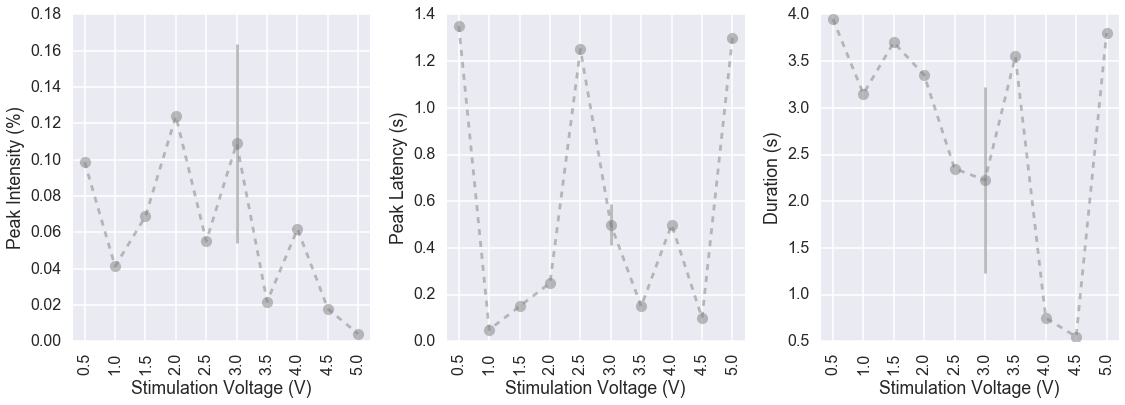

In [7]:
date_list = ["8月9日"]
plt.figure(figsize=(16,6))

for date in date_list:
    tmp = None
    tmp = AAFremoved[AAFremoved["date"]==date]
    
    plt.subplot(131)
    tmp_MaxResponse_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50")["Max Response (%)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_MaxResponse_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_MaxResponse_f.std()/np.sqrt(tmp_MaxResponse_f.count()))

    plt.subplot(132)
    tmp_latency_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50")["Peak Latency (s)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_latency_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_latency_f.std()/np.sqrt(tmp_latency_f.count()))

    plt.subplot(133)
    tmp_duration_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50")["duration (s)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_duration_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_duration_f.std()/np.sqrt(tmp_duration_f.count()))



plt.subplot(131)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Intensity (%)")

plt.subplot(132)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Latency (s)")

plt.subplot(133)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Duration (s)")

plt.tight_layout()
plt.savefig("merged-0809-v01-8f50.png", dpi=300)

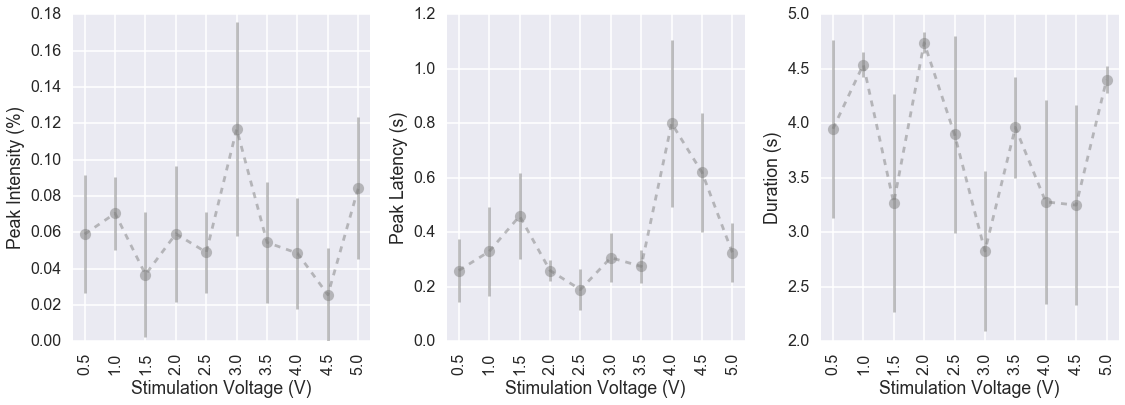

In [8]:
date_list = ["9月28日"]
plt.figure(figsize=(16,6))

for date in date_list:
    tmp = None
    tmp = AAFremoved[AAFremoved["date"]==date]
    
    plt.subplot(131)
    tmp_MaxResponse_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50")["Max Response (%)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_MaxResponse_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_MaxResponse_f.std()/np.sqrt(tmp_MaxResponse_f.count()))

    plt.subplot(132)
    tmp_latency_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50")["Peak Latency (s)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_latency_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_latency_f.std()/np.sqrt(tmp_latency_f.count()))

    plt.subplot(133)
    tmp_duration_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50")["duration (s)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_duration_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_duration_f.std()/np.sqrt(tmp_duration_f.count()))


plt.subplot(131)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Intensity (%)")

plt.subplot(132)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Latency (s)")

plt.subplot(133)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Duration (s)")

plt.tight_layout()
plt.savefig("merged-0928-v01-8f50.png", dpi=300)

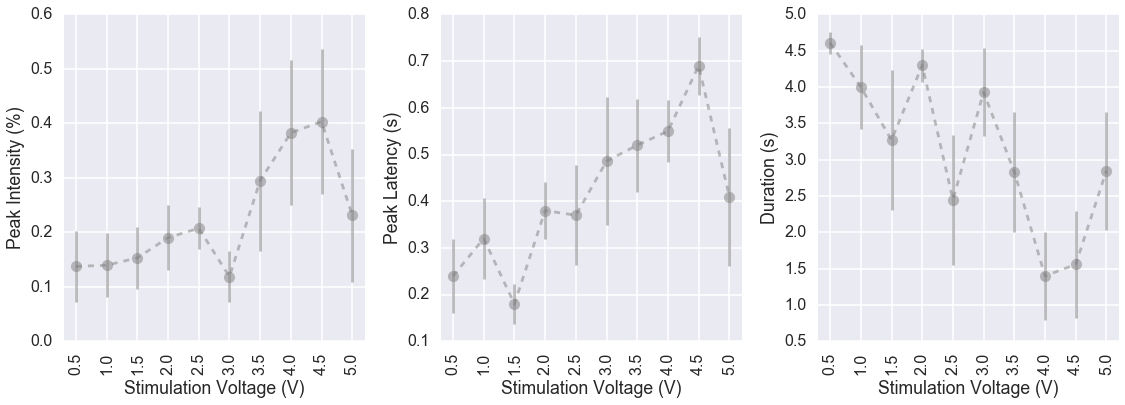

In [9]:
date_list = ["9月29日"]
plt.figure(figsize=(16,6))

for date in date_list:
    tmp = None
    tmp = AAFremoved[AAFremoved["date"]==date]
    
    plt.subplot(131)
    tmp_MaxResponse_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50")["Max Response (%)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_MaxResponse_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_MaxResponse_f.std()/np.sqrt(tmp_MaxResponse_f.count()))

    plt.subplot(132)
    tmp_latency_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50")["Peak Latency (s)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_latency_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_latency_f.std()/np.sqrt(tmp_latency_f.count()))

    plt.subplot(133)
    tmp_duration_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50")["duration (s)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_duration_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_duration_f.std()/np.sqrt(tmp_duration_f.count()))



plt.subplot(131)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Intensity (%)")

plt.subplot(132)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Latency (s)")

plt.subplot(133)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Duration (s)")

plt.tight_layout()
plt.savefig("merged-0929-v01-8f50.png", dpi=300)

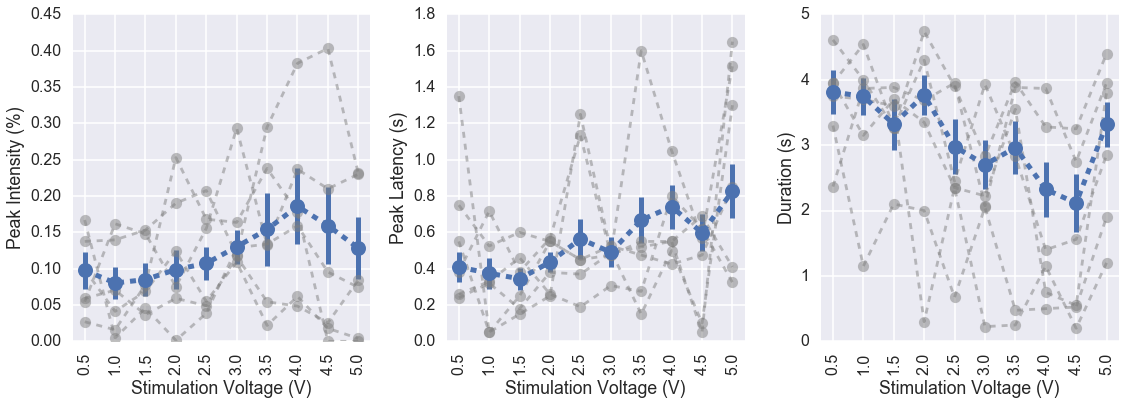

In [10]:
# Without5/24<-全て負 8f<=frame<=50f 0.5s(onset)<=time<=2.5s(onsetから2s) <-onset以降かつ右肩上がりの信号の検出を除外するため

date_list = ["4月8日","5月10日","8月2日","8月9日","9月28日","9月29日"]
plt.figure(figsize=(16,6))

for date in date_list:
    tmp = None
    tmp = AAFremoved[AAFremoved["date"]==date]
    
    try:
        plt.subplot(131)
        tmp_MaxResponse_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50")["Max Response (%)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_MaxResponse_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--")

        plt.subplot(132)
        tmp_latency_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50")["Peak Latency (s)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_latency_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--")

        plt.subplot(133)
        tmp_duration_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50")["duration (s)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_duration_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--")
    except TypeError:
        print(date)


plt.subplot(131)
grouped_MaxResponse_f = AAFremoved.query("voltage > 0.1 & 8 < p_frame & p_frame < 50")["Max Response (%)"].groupby(AAFremoved["Stimulation Voltage (V)"])
grouped_MaxResponse_f.mean().plot(linewidth="5",markersize="15",marker="o",linestyle="--", yerr=grouped_MaxResponse_f.std()/np.sqrt(grouped_MaxResponse_f.count()))
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Intensity (%)")

plt.subplot(132)
grouped_latency_f = AAFremoved.query("voltage > 0.1 & 8 < p_frame & p_frame < 50")["Peak Latency (s)"].groupby(AAFremoved["Stimulation Voltage (V)"])
grouped_latency_f.mean().plot(linewidth="5",markersize="15",marker="o",linestyle="--", yerr=grouped_latency_f.std()/np.sqrt(grouped_latency_f.count()))
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Latency (s)")

plt.subplot(133)
grouped_duration_f = AAFremoved.query("voltage > 0.1 & 8 < p_frame & p_frame < 50")["duration (s)"].groupby(AAFremoved["Stimulation Voltage (V)"])
grouped_duration_f.mean().plot(linewidth="5",markersize="15",marker="o",linestyle="--", yerr=grouped_duration_f.std()/np.sqrt(grouped_duration_f.count()))
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Duration (s)")
plt.tight_layout()
plt.savefig("merged-Without0524-v01-8f50.png", dpi=300)

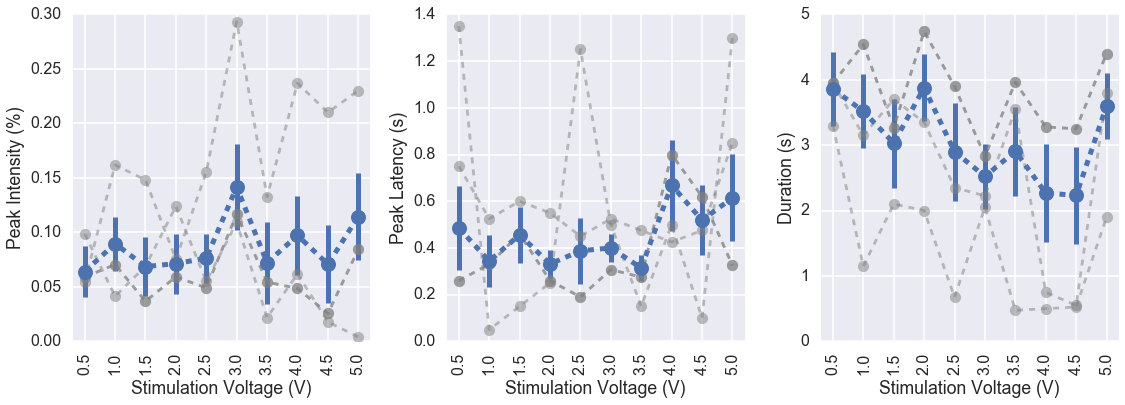

In [11]:
# 4/8 8/9 9/28 9/29 完全に大丈夫なデータセットのみ 
#8f<=frame<=50f 0.5s(onset)<=time<=2.5s(onsetから2s)

date_list = ["4月8日","8月9日","9月28日","9月28日"]
plt.figure(figsize=(16,6))

for date in date_list:
    tmp = None
    tmp = AAFremoved[AAFremoved["date"]==date]
    
    try:
        plt.subplot(131)
        tmp_MaxResponse_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50")["Max Response (%)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_MaxResponse_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--")

        plt.subplot(132)
        tmp_latency_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50")["Peak Latency (s)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_latency_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--")

        plt.subplot(133)
        tmp_duration_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50")["duration (s)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_duration_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--")
    except TypeError:
        print(date)


plt.subplot(131)
grouped_MaxResponse_f = AAFremoved.query("date in @date_list & voltage > 0.1 & 8 < p_frame & p_frame < 50")["Max Response (%)"].groupby(AAFremoved["Stimulation Voltage (V)"])
grouped_MaxResponse_f.mean().plot(linewidth="5",markersize="15",marker="o",linestyle="--", yerr=grouped_MaxResponse_f.std()/np.sqrt(grouped_MaxResponse_f.count()))
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Intensity (%)")

plt.subplot(132)
grouped_latency_f = AAFremoved.query("date in @date_list & voltage > 0.1 & 8 < p_frame & p_frame < 50")["Peak Latency (s)"].groupby(AAFremoved["Stimulation Voltage (V)"])
grouped_latency_f.mean().plot(linewidth="5",markersize="15",marker="o",linestyle="--", yerr=grouped_latency_f.std()/np.sqrt(grouped_latency_f.count()))
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Latency (s)")

plt.subplot(133)
grouped_duration_f = AAFremoved.query("date in @date_list & voltage > 0.1 & 8 < p_frame & p_frame < 50")["duration (s)"].groupby(AAFremoved["Stimulation Voltage (V)"])
grouped_duration_f.mean().plot(linewidth="5",markersize="15",marker="o",linestyle="--", yerr=grouped_duration_f.std()/np.sqrt(grouped_duration_f.count()))
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Duration (s)")
plt.tight_layout()
plt.savefig("merged-0408_0809_0928_0929-v01-8f50.png", dpi=300)

In [12]:
AAFremoved["p_ref"] = AAFremoved["date"]
AAFremoved["p_ref"] = AAFremoved["date"].apply(lambda date: Ref[Ref["date"]==date]["p_max"].mean())
AAFremoved["p_max_norm"] = AAFremoved["p_max"] / AAFremoved["p_ref"] * 100

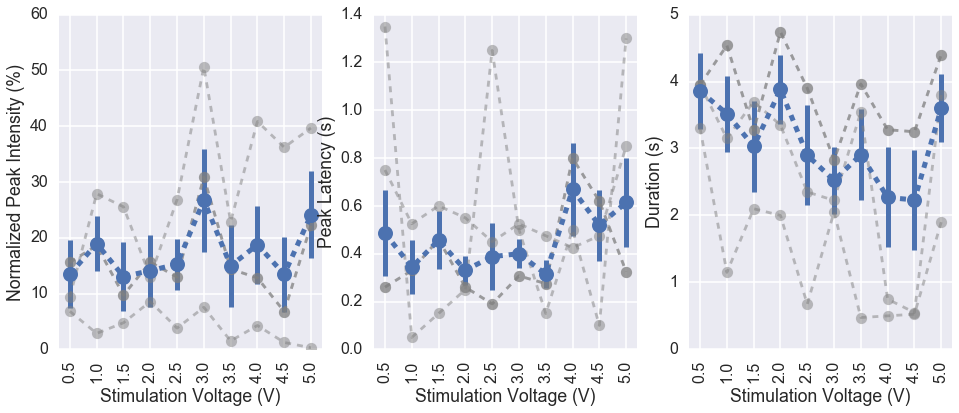

In [13]:
# 4/8 8/9 9/28 9/29 完全に大丈夫なデータセットのみ 
#8f<=frame<=50f 0.5s(onset)<=time<=2.5s(onsetから2s)
# p_max_norm 聴覚応答で正規化した最大応答強度

date_list = ["4月8日","8月9日","9月28日","9月28日"]
plt.figure(figsize=(16,6))

for date in date_list:
    tmp = None
    tmp = AAFremoved[AAFremoved["date"]==date]
    
    try:
        plt.subplot(131)
        tmp_MaxResponse_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50")["p_max_norm"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_MaxResponse_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--")

        plt.subplot(132)
        tmp_latency_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50")["Peak Latency (s)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_latency_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--")

        plt.subplot(133)
        tmp_duration_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50")["duration (s)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_duration_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--")
    except TypeError:
        print(date)


plt.subplot(131)
grouped_MaxResponse_f = AAFremoved.query("date in @date_list & voltage > 0.1 & 8 < p_frame & p_frame < 50")["p_max_norm"].groupby(AAFremoved["Stimulation Voltage (V)"])
grouped_MaxResponse_f.mean().plot(linewidth="5",markersize="15",marker="o",linestyle="--", yerr=grouped_MaxResponse_f.std()/np.sqrt(grouped_MaxResponse_f.count()))
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Normalized Peak Intensity (%)")

plt.subplot(132)
grouped_latency_f = AAFremoved.query("date in @date_list & voltage > 0.1 & 8 < p_frame & p_frame < 50")["Peak Latency (s)"].groupby(AAFremoved["Stimulation Voltage (V)"])
grouped_latency_f.mean().plot(linewidth="5",markersize="15",marker="o",linestyle="--", yerr=grouped_latency_f.std()/np.sqrt(grouped_latency_f.count()))
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Latency (s)")

plt.subplot(133)
grouped_duration_f = AAFremoved.query("date in @date_list & voltage > 0.1 & 8 < p_frame & p_frame < 50")["duration (s)"].groupby(AAFremoved["Stimulation Voltage (V)"])
grouped_duration_f.mean().plot(linewidth="5",markersize="15",marker="o",linestyle="--", yerr=grouped_duration_f.std()/np.sqrt(grouped_duration_f.count()))
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Duration (s)")
# 4/8 8/9 9/28 9/29 完全に大丈夫なデータセットのみ 
#8f<=frame<=50f 0.5s(onset)<=time<=2.5s(onsetから2s)
# p_max_norm 聴覚応答で正規化した最大応答強度plt.tight_layout()
plt.savefig("merged-0408_0809_0928_0929-Normalized-v01-8f50.png", dpi=300)

5月24日


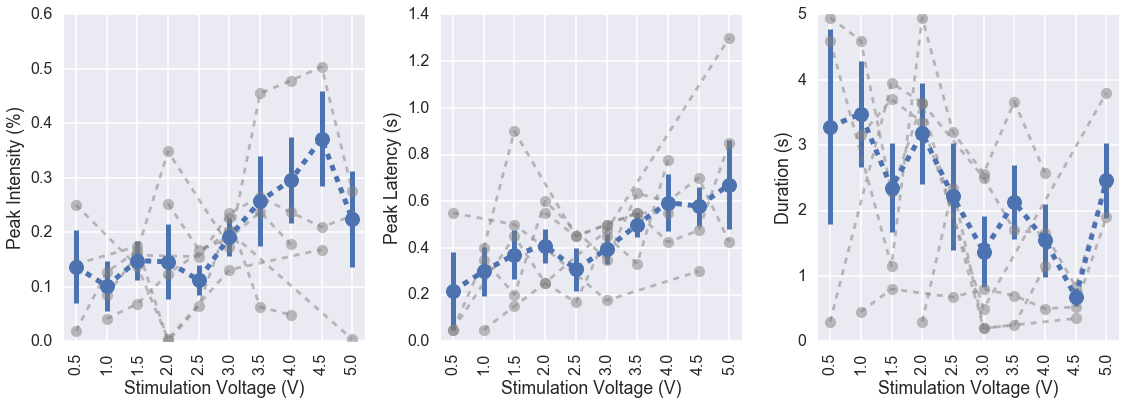

In [14]:
# 4/8-9/29 8f<=frame<=50f 0.5s(onset)<=time<=2.5s(onsetから2s) <-onset以降かつ右肩上がりの信号の検出を除外するため
#正規ピークチェック済み

date_list = ["4月8日","5月10日","5月24日","8月2日","8月9日","9月28日","9月29日"]
plt.figure(figsize=(16,6))

for date in date_list:
    tmp = None
    tmp = AAFremoved[AAFremoved["date"]==date]
    
    try:
        plt.subplot(131)
        tmp_MaxResponse_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared == True")["Max Response (%)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_MaxResponse_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--")

        plt.subplot(132)
        tmp_latency_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared == True")["Peak Latency (s)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_latency_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--")

        plt.subplot(133)
        tmp_duration_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared == True")["duration (s)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_duration_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--")
    except TypeError:
        print(date)


plt.subplot(131)
grouped_MaxResponse_f = AAFremoved.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared == True")["Max Response (%)"].groupby(AAFremoved["Stimulation Voltage (V)"])
grouped_MaxResponse_f.mean().plot(linewidth="5",markersize="15",marker="o",linestyle="--", yerr=grouped_MaxResponse_f.std()/np.sqrt(grouped_MaxResponse_f.count()))
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Intensity (%)")

plt.subplot(132)
grouped_latency_f = AAFremoved.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared == True")["Peak Latency (s)"].groupby(AAFremoved["Stimulation Voltage (V)"])
grouped_latency_f.mean().plot(linewidth="5",markersize="15",marker="o",linestyle="--", yerr=grouped_latency_f.std()/np.sqrt(grouped_latency_f.count()))
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Latency (s)")

plt.subplot(133)
grouped_duration_f = AAFremoved.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared == True")["duration (s)"].groupby(AAFremoved["Stimulation Voltage (V)"])
grouped_duration_f.mean().plot(linewidth="5",markersize="15",marker="o",linestyle="--", yerr=grouped_duration_f.std()/np.sqrt(grouped_duration_f.count()))
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Duration (s)")
plt.tight_layout()
#plt.savefig("AAFremoved-processed.png", dpi=300)
plt.savefig("merged-AllDate-checked-v01-8f50.png", dpi=300)

5月24日


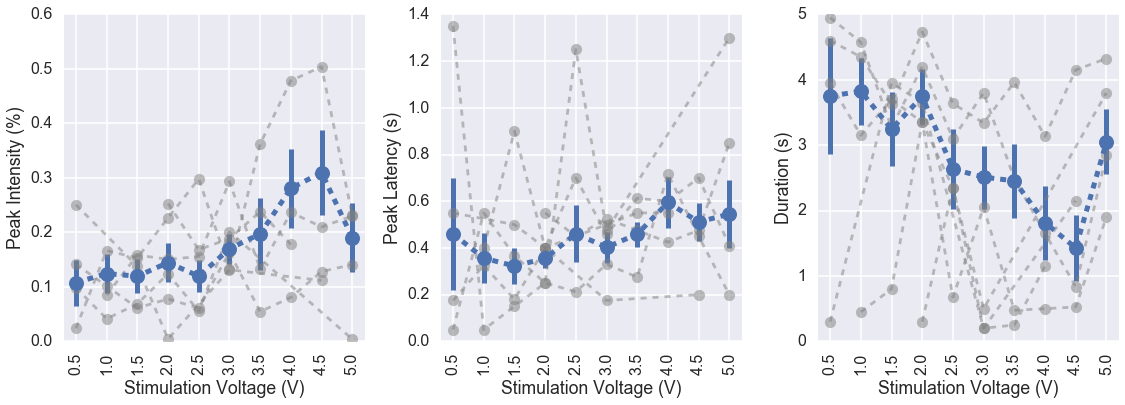

In [15]:
# 4/8-9/29 8f<=frame<=50f 0.5s(onset)<=time<=2.5s(onsetから2s) <-onset以降かつ右肩上がりの信号の検出を除外するため
#正規ピークチェック済み->誤認識分の補正も完了

date_list = ["4月8日","5月10日","5月24日","8月2日","8月9日","9月28日","9月29日"]
plt.figure(figsize=(16,6))

for date in date_list:
    tmp = None
    tmp = AAFremoved[AAFremoved["date"]==date]
    
    try:
        plt.subplot(131)
        tmp_MaxResponse_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["Max Response (%)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_MaxResponse_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--")

        plt.subplot(132)
        tmp_latency_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["Peak Latency (s)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_latency_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--")

        plt.subplot(133)
        tmp_duration_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["duration (s)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_duration_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--")
    except TypeError:
        print(date)


plt.subplot(131)
grouped_MaxResponse_f = AAFremoved.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["Max Response (%)"].groupby(AAFremoved["Stimulation Voltage (V)"])
grouped_MaxResponse_f.mean().plot(linewidth="5",markersize="15",marker="o",linestyle="--", yerr=grouped_MaxResponse_f.std()/np.sqrt(grouped_MaxResponse_f.count()))
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Intensity (%)")

plt.subplot(132)
grouped_latency_f = AAFremoved.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["Peak Latency (s)"].groupby(AAFremoved["Stimulation Voltage (V)"])
grouped_latency_f.mean().plot(linewidth="5",markersize="15",marker="o",linestyle="--", yerr=grouped_latency_f.std()/np.sqrt(grouped_latency_f.count()))
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Latency (s)")

plt.subplot(133)
grouped_duration_f = AAFremoved.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["duration (s)"].groupby(AAFremoved["Stimulation Voltage (V)"])
grouped_duration_f.mean().plot(linewidth="5",markersize="15",marker="o",linestyle="--", yerr=grouped_duration_f.std()/np.sqrt(grouped_duration_f.count()))
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Duration (s)")
plt.tight_layout()
#plt.savefig("AAFremoved-processed.png", dpi=300)
plt.savefig("merged-AllDate-checked-repaired-v01-8f50.png", dpi=300)

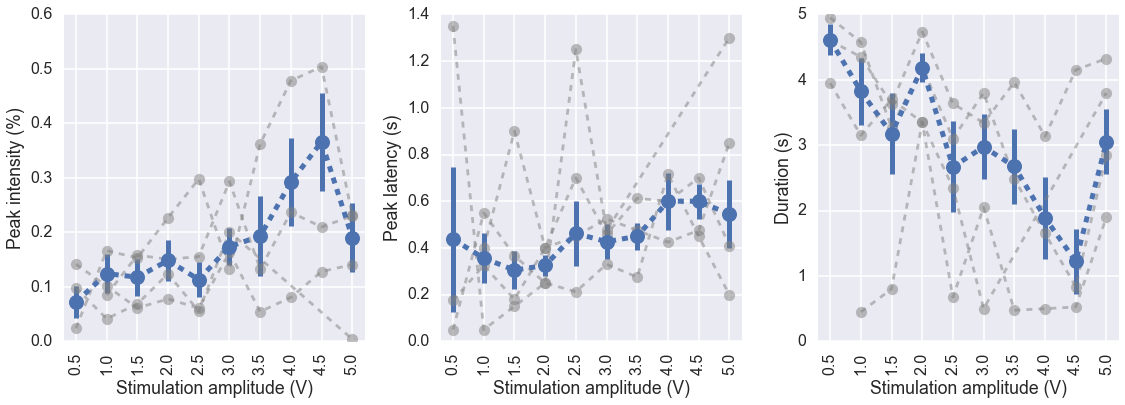

In [13]:
# 4/8 8/9 9/28 9/29 8f<=frame<=50f 0.5s(onset)<=time<=2.5s(onsetから2s) <-onset以降かつ右肩上がりの信号の検出を除外するため
#正規ピークチェック済み->誤認識分の補正も完了
#論文へ使用予定

date_list = ["4月8日","8月9日","9月28日","9月29日"]
plt.figure(figsize=(16,6))

for date in date_list:
    tmp = None
    tmp = AAFremoved[AAFremoved["date"]==date]
    
    try:
        plt.subplot(131)
        tmp_MaxResponse_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["Max Response (%)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_MaxResponse_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--")

        plt.subplot(132)
        tmp_latency_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["Peak Latency (s)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_latency_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--")

        plt.subplot(133)
        tmp_duration_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["duration (s)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_duration_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--")
    except TypeError:
        print(date)


plt.subplot(131)
grouped_MaxResponse_f = AAFremoved.query("date in @date_list & voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["Max Response (%)"].groupby(AAFremoved["Stimulation Voltage (V)"])
grouped_MaxResponse_f.mean().plot(linewidth="5",markersize="15",marker="o",linestyle="--", yerr=grouped_MaxResponse_f.std()/np.sqrt(grouped_MaxResponse_f.count()))
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak intensity (%)")
plt.xlabel("Stimulation amplitude (V)")

plt.subplot(132)
grouped_latency_f = AAFremoved.query("date in @date_list & voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["Peak Latency (s)"].groupby(AAFremoved["Stimulation Voltage (V)"])
grouped_latency_f.mean().plot(linewidth="5",markersize="15",marker="o",linestyle="--", yerr=grouped_latency_f.std()/np.sqrt(grouped_latency_f.count()))
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak latency (s)")
plt.xlabel("Stimulation amplitude (V)")

plt.subplot(133)
grouped_duration_f = AAFremoved.query("date in @date_list & voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["duration (s)"].groupby(AAFremoved["Stimulation Voltage (V)"])
grouped_duration_f.mean().plot(linewidth="5",markersize="15",marker="o",linestyle="--", yerr=grouped_duration_f.std()/np.sqrt(grouped_duration_f.count()))
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Duration (s)")
plt.xlabel("Stimulation amplitude (V)")

plt.tight_layout()
#plt.savefig("AAFremoved-processed.png", dpi=300)
#plt.savefig("merged-0408_0809_0928_0929-checked-repaired-v01-8f50.png", dpi=300)
plt.savefig("merged-0408_0809_0928_0929-checked-repaired-v01-8f50.pdf", dpi=300)

5月24日


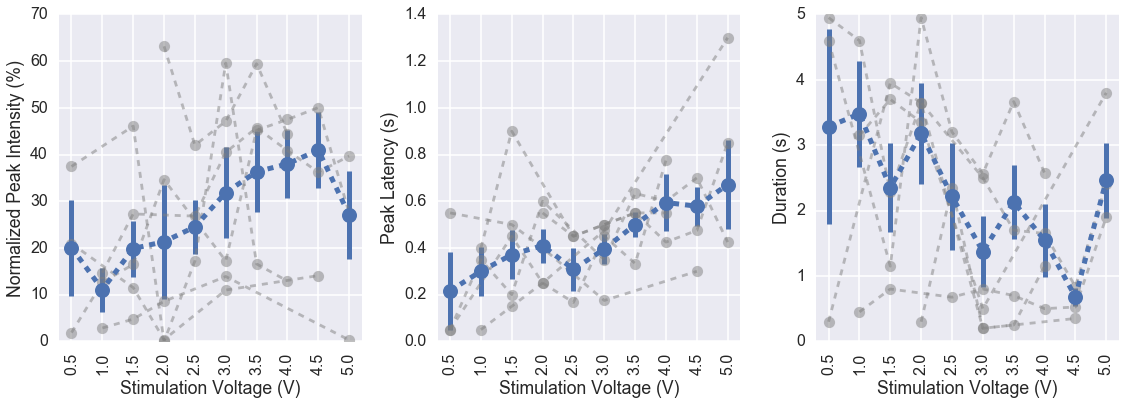

In [16]:
# 4/8-9/29 8f<=frame<=50f 0.5s(onset)<=time<=2.5s(onsetから2s) <-onset以降かつ右肩上がりの信号の検出を除外するため
#正規ピークであることをチェック済み
# p_max_norm 聴覚応答で正規化した最大応答強度

date_list = ["4月8日","5月10日","5月24日","8月2日","8月9日","9月28日","9月29日"]
plt.figure(figsize=(16,6))

for date in date_list:
    tmp = None
    tmp = AAFremoved[AAFremoved["date"]==date]
    
    try:
        plt.subplot(131)
        tmp_MaxResponse_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared == True")["p_max_norm"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_MaxResponse_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--")

        plt.subplot(132)
        tmp_latency_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared == True")["Peak Latency (s)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_latency_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--")

        plt.subplot(133)
        tmp_duration_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared == True")["duration (s)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_duration_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--")
    except TypeError:
        print(date)


plt.subplot(131)
grouped_MaxResponse_f = AAFremoved.query("date in @date_list & voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared == True")["p_max_norm"].groupby(AAFremoved["Stimulation Voltage (V)"])
grouped_MaxResponse_f.mean().plot(linewidth="5",markersize="15",marker="o",linestyle="--", yerr=grouped_MaxResponse_f.std()/np.sqrt(grouped_MaxResponse_f.count()))
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Normalized Peak Intensity (%)")

plt.subplot(132)
grouped_latency_f = AAFremoved.query("date in @date_list & voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared == True")["Peak Latency (s)"].groupby(AAFremoved["Stimulation Voltage (V)"])
grouped_latency_f.mean().plot(linewidth="5",markersize="15",marker="o",linestyle="--", yerr=grouped_latency_f.std()/np.sqrt(grouped_latency_f.count()))
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Latency (s)")

plt.subplot(133)
grouped_duration_f = AAFremoved.query("date in @date_list & voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared == True")["duration (s)"].groupby(AAFremoved["Stimulation Voltage (V)"])
grouped_duration_f.mean().plot(linewidth="5",markersize="15",marker="o",linestyle="--", yerr=grouped_duration_f.std()/np.sqrt(grouped_duration_f.count()))
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Duration (s)")
plt.tight_layout()
plt.savefig("merged-AllDate-Normalized-checked-v01-8f50.png", dpi=300)

5月24日


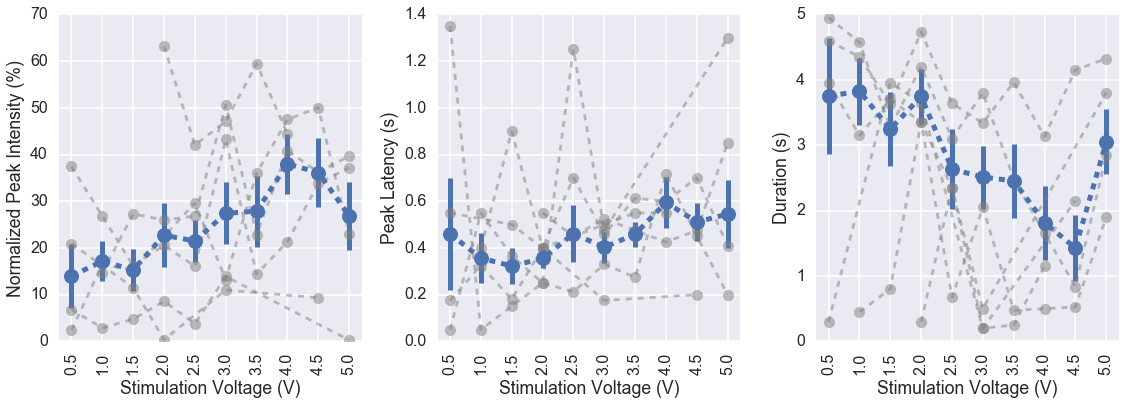

In [17]:
# 4/8-9/29 8f<=frame<=50f 0.5s(onset)<=time<=2.5s(onsetから2s) <-onset以降かつ右肩上がりの信号の検出を除外するため
#正規ピークであることをチェック済み<-誤認識データも補正済
# p_max_norm 聴覚応答で正規化した最大応答強度

date_list = ["4月8日","5月10日","5月24日","8月2日","8月9日","9月28日","9月29日"]
plt.figure(figsize=(16,6))

for date in date_list:
    tmp = None
    tmp = AAFremoved[AAFremoved["date"]==date]
    
    try:
        plt.subplot(131)
        tmp_MaxResponse_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["p_max_norm"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_MaxResponse_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--")

        plt.subplot(132)
        tmp_latency_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["Peak Latency (s)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_latency_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--")

        plt.subplot(133)
        tmp_duration_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["duration (s)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_duration_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--")
    except TypeError:
        print(date)


plt.subplot(131)
grouped_MaxResponse_f = AAFremoved.query("date in @date_list & voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["p_max_norm"].groupby(AAFremoved["Stimulation Voltage (V)"])
grouped_MaxResponse_f.mean().plot(linewidth="5",markersize="15",marker="o",linestyle="--", yerr=grouped_MaxResponse_f.std()/np.sqrt(grouped_MaxResponse_f.count()))
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Normalized Peak Intensity (%)")

plt.subplot(132)
grouped_latency_f = AAFremoved.query("date in @date_list & voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["Peak Latency (s)"].groupby(AAFremoved["Stimulation Voltage (V)"])
grouped_latency_f.mean().plot(linewidth="5",markersize="15",marker="o",linestyle="--", yerr=grouped_latency_f.std()/np.sqrt(grouped_latency_f.count()))
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Latency (s)")

plt.subplot(133)
grouped_duration_f = AAFremoved.query("date in @date_list & voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["duration (s)"].groupby(AAFremoved["Stimulation Voltage (V)"])
grouped_duration_f.mean().plot(linewidth="5",markersize="15",marker="o",linestyle="--", yerr=grouped_duration_f.std()/np.sqrt(grouped_duration_f.count()))
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Duration (s)")
plt.tight_layout()
plt.savefig("merged-AllDate-Normalized-checked-repaired-v01-8f50.png", dpi=300)

5月24日


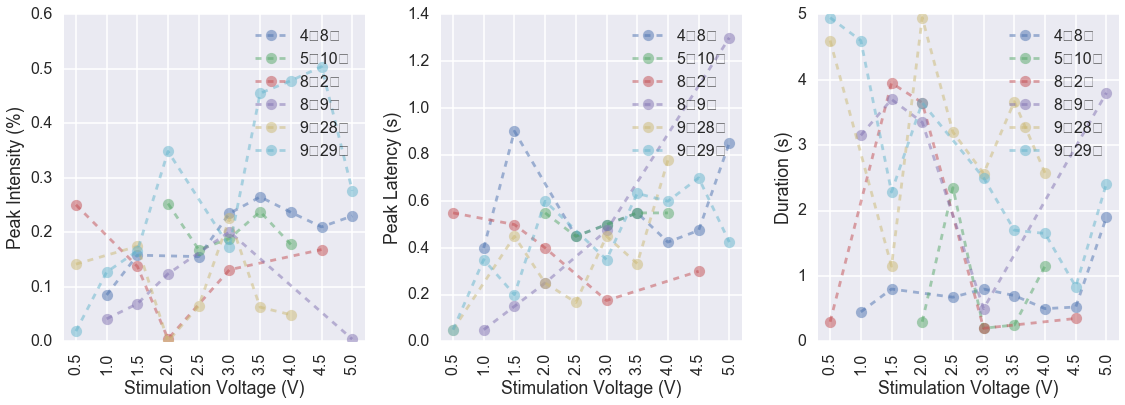

In [18]:
# 4/8-9/29 8f<=frame<=50f 0.5s(onset)<=time<=2.5s(onsetから2s) <-onset以降かつ右肩上がりの信号の検出を除外するため
#各個体データ
#正規ピークチェック済み

date_list = ["4月8日","5月10日","5月24日","8月2日","8月9日","9月28日","9月29日"]
plt.figure(figsize=(16,6))

for date in date_list:
    tmp = None
    tmp = AAFremoved[AAFremoved["date"]==date]
    
    try:
        plt.subplot(131)
        tmp_MaxResponse_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared == True")["Max Response (%)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_MaxResponse_f.mean().plot(alpha=0.5,marker="o",linestyle="--", label=date)

        plt.subplot(132)
        tmp_latency_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared == True")["Peak Latency (s)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_latency_f.mean().plot(alpha=0.5,marker="o",linestyle="--", label=date)

        plt.subplot(133)
        tmp_duration_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared == True")["duration (s)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_duration_f.mean().plot(alpha=0.5,marker="o",linestyle="--", label=date)
    except TypeError:
        print(date)


plt.subplot(131)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Intensity (%)")
plt.legend()

plt.subplot(132)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Latency (s)")
plt.legend()

plt.subplot(133)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Duration (s)")
plt.tight_layout()
plt.legend()
#plt.savefig("AAFremoved-processed.png", dpi=300)
plt.savefig("merged-Each-checked-v01-8f50.png", dpi=300)

5月24日


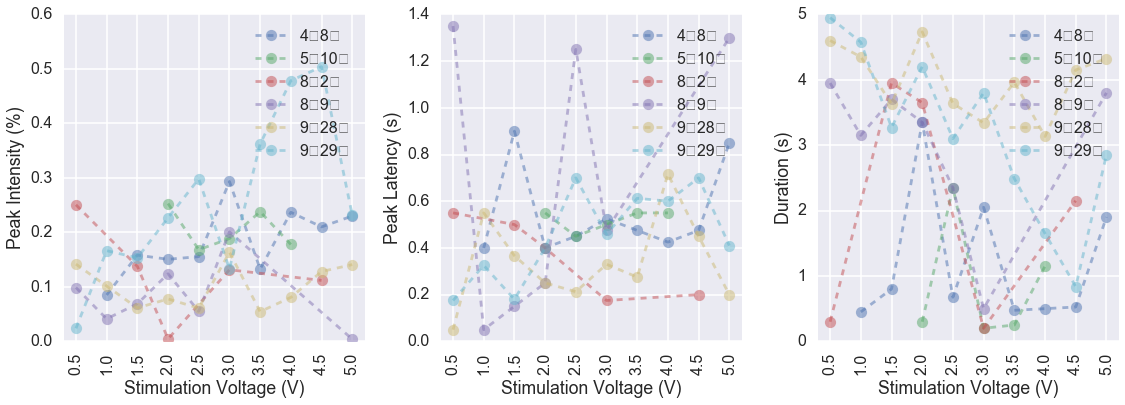

In [19]:
# 4/8-9/29 8f<=frame<=50f 0.5s(onset)<=time<=2.5s(onsetから2s) <-onset以降かつ右肩上がりの信号の検出を除外するため
#各個体データ
#正規ピークチェック済み<-誤認識データも補正済

date_list = ["4月8日","5月10日","5月24日","8月2日","8月9日","9月28日","9月29日"]
plt.figure(figsize=(16,6))

for date in date_list:
    tmp = None
    tmp = AAFremoved[AAFremoved["date"]==date]
    
    try:
        plt.subplot(131)
        tmp_MaxResponse_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["Max Response (%)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_MaxResponse_f.mean().plot(alpha=0.5,marker="o",linestyle="--", label=date)

        plt.subplot(132)
        tmp_latency_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["Peak Latency (s)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_latency_f.mean().plot(alpha=0.5,marker="o",linestyle="--", label=date)

        plt.subplot(133)
        tmp_duration_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["duration (s)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_duration_f.mean().plot(alpha=0.5,marker="o",linestyle="--", label=date)
    except TypeError:
        print(date)


plt.subplot(131)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Intensity (%)")
plt.legend()

plt.subplot(132)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Latency (s)")
plt.legend()

plt.subplot(133)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Duration (s)")
plt.tight_layout()
plt.legend()
#plt.savefig("AAFremoved-processed.png", dpi=300)
plt.savefig("merged-Each-checked-repaired-v01-8f50.png", dpi=300)

5月24日


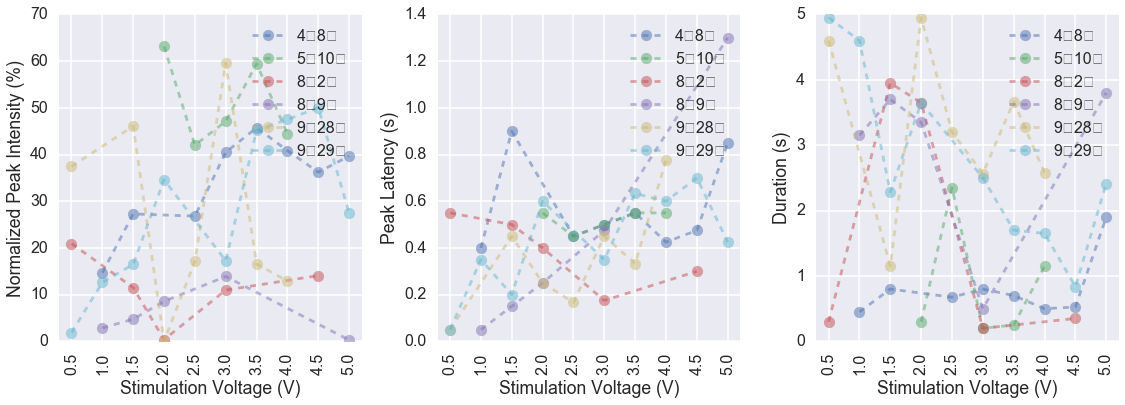

In [20]:
# 4/8-9/29 8f<=frame<=50f 0.5s(onset)<=time<=2.5s(onsetから2s) <-onset以降かつ右肩上がりの信号の検出を除外するため
#各個体データ
#正規ピークチェック済み

date_list = ["4月8日","5月10日","5月24日","8月2日","8月9日","9月28日","9月29日"]
plt.figure(figsize=(16,6))

for date in date_list:
    tmp = None
    tmp = AAFremoved[AAFremoved["date"]==date]
    
    try:
        plt.subplot(131)
        tmp_MaxResponse_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared == True")["p_max_norm"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_MaxResponse_f.mean().plot(alpha=0.5,marker="o",linestyle="--", label=date)

        plt.subplot(132)
        tmp_latency_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared == True")["Peak Latency (s)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_latency_f.mean().plot(alpha=0.5,marker="o",linestyle="--", label=date)

        plt.subplot(133)
        tmp_duration_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared == True")["duration (s)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_duration_f.mean().plot(alpha=0.5,marker="o",linestyle="--", label=date)
    except TypeError:
        print(date)


plt.subplot(131)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Normalized Peak Intensity (%)")
plt.legend()

plt.subplot(132)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Latency (s)")
plt.legend()

plt.subplot(133)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Duration (s)")
plt.tight_layout()
plt.legend()
#plt.savefig("AAFremoved-processed.png", dpi=300)
plt.savefig("merged-Each-Normalized-checked-v01-8f50.png", dpi=300)

5月24日


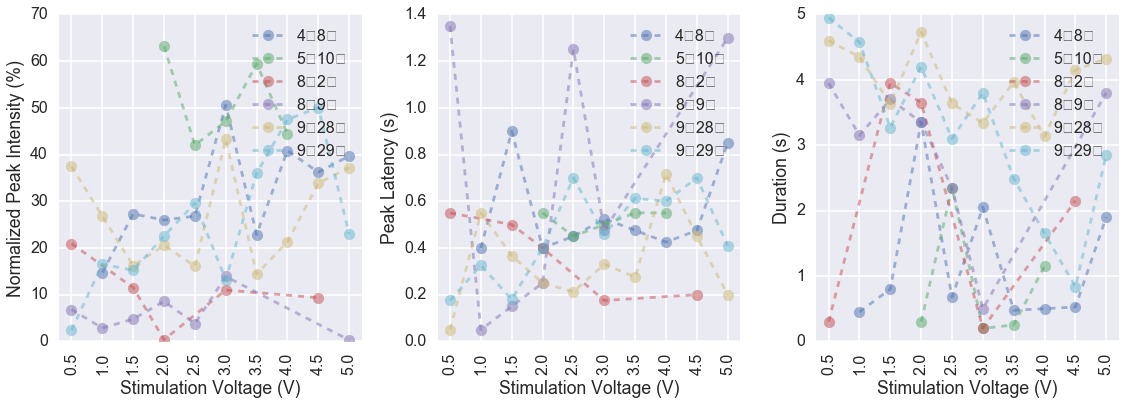

In [21]:
# 4/8-9/29 8f<=frame<=50f 0.5s(onset)<=time<=2.5s(onsetから2s) <-onset以降かつ右肩上がりの信号の検出を除外するため
#各個体データ
#正規ピークチェック済み<-誤認識補正済

date_list = ["4月8日","5月10日","5月24日","8月2日","8月9日","9月28日","9月29日"]
plt.figure(figsize=(16,6))

for date in date_list:
    tmp = None
    tmp = AAFremoved[AAFremoved["date"]==date]
    
    try:
        plt.subplot(131)
        tmp_MaxResponse_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["p_max_norm"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_MaxResponse_f.mean().plot(alpha=0.5,marker="o",linestyle="--", label=date)

        plt.subplot(132)
        tmp_latency_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["Peak Latency (s)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_latency_f.mean().plot(alpha=0.5,marker="o",linestyle="--", label=date)

        plt.subplot(133)
        tmp_duration_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["duration (s)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_duration_f.mean().plot(alpha=0.5,marker="o",linestyle="--", label=date)
    except TypeError:
        print(date)


plt.subplot(131)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Normalized Peak Intensity (%)")
plt.legend()

plt.subplot(132)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Latency (s)")
plt.legend()

plt.subplot(133)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Duration (s)")
plt.tight_layout()
plt.legend()
#plt.savefig("AAFremoved-processed.png", dpi=300)
plt.savefig("merged-Each-Normalized-checked-repaired-v01-8f50.png", dpi=300)

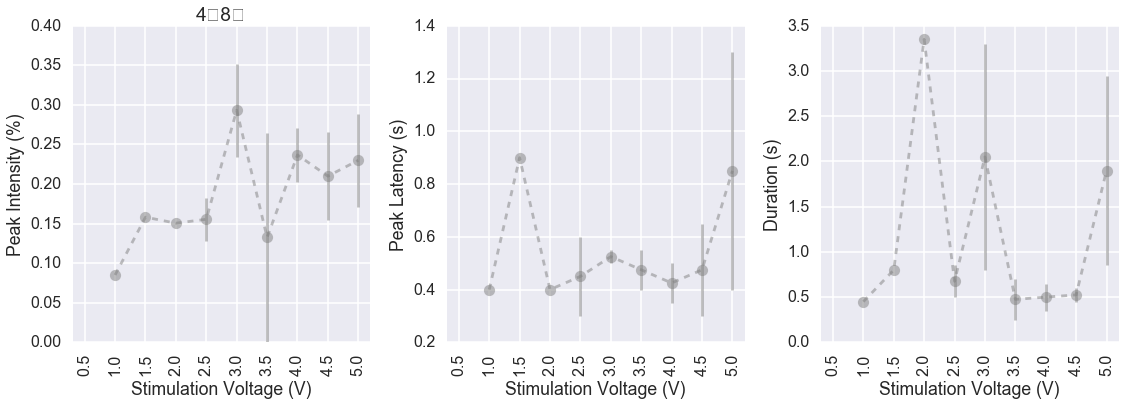

In [3]:
date_list = ["4月8日"]
plt.figure(figsize=(16,6))

for date in date_list:
    tmp = None
    tmp = AAFremoved[AAFremoved["date"]==date]
    
    plt.subplot(131)
    tmp_MaxResponse_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["Max Response (%)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_MaxResponse_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_MaxResponse_f.std()/np.sqrt(tmp_MaxResponse_f.count()))

    plt.subplot(132)
    tmp_latency_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["Peak Latency (s)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_latency_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_latency_f.std()/np.sqrt(tmp_latency_f.count()))

    plt.subplot(133)
    tmp_duration_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["duration (s)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_duration_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_duration_f.std()/np.sqrt(tmp_duration_f.count()))


plt.subplot(131)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Intensity (%)")
plt.title(date)

plt.subplot(132)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Latency (s)")

plt.subplot(133)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Duration (s)")

plt.tight_layout()

plt.savefig("merged-checked-repaired-0408-v01-8f50.png", dpi=300)

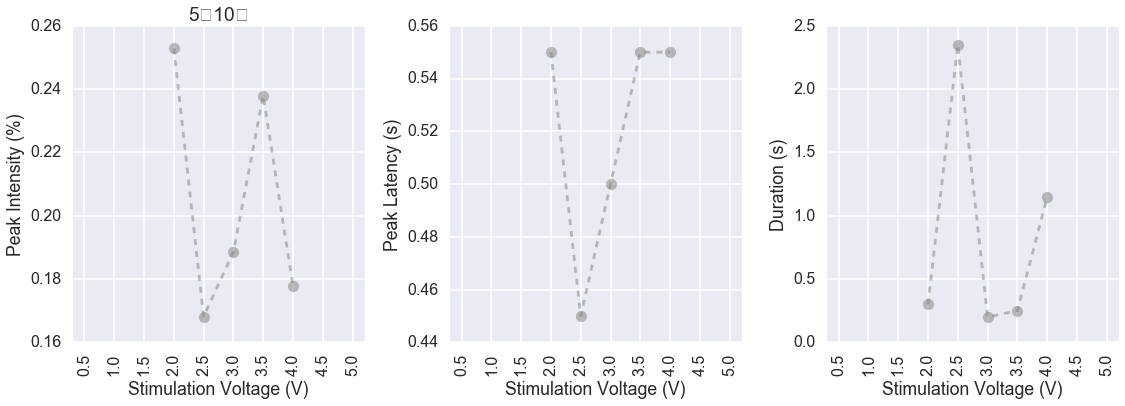

In [4]:
date_list = ["5月10日"]
plt.figure(figsize=(16,6))

for date in date_list:
    tmp = None
    tmp = AAFremoved[AAFremoved["date"]==date]
    
    plt.subplot(131)
    tmp_MaxResponse_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["Max Response (%)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_MaxResponse_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_MaxResponse_f.std()/np.sqrt(tmp_MaxResponse_f.count()))

    plt.subplot(132)
    tmp_latency_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["Peak Latency (s)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_latency_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_latency_f.std()/np.sqrt(tmp_latency_f.count()))

    plt.subplot(133)
    tmp_duration_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["duration (s)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_duration_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_duration_f.std()/np.sqrt(tmp_duration_f.count()))


plt.subplot(131)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Intensity (%)")
plt.title(date)

plt.subplot(132)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Latency (s)")

plt.subplot(133)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Duration (s)")

plt.tight_layout()

plt.savefig("merged-checked-repaired-0510-v01-8f50.png", dpi=300)

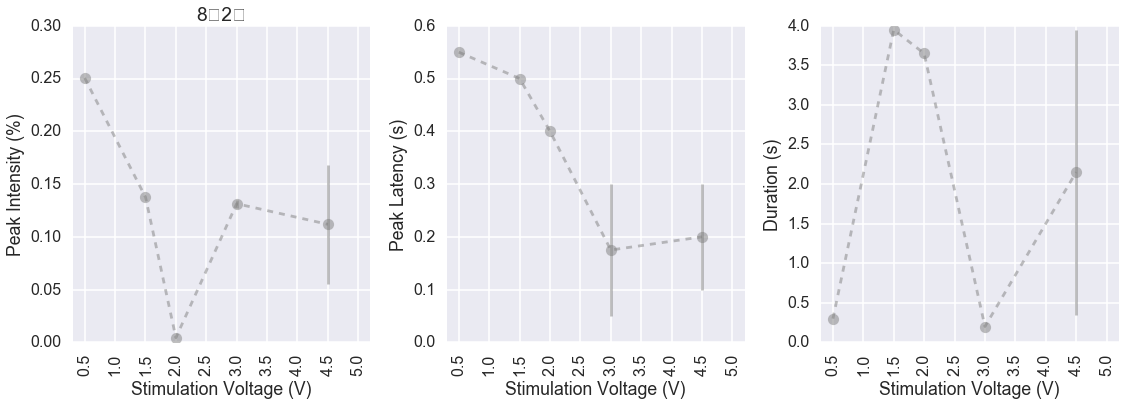

In [5]:
date_list = ["8月2日"]
plt.figure(figsize=(16,6))

for date in date_list:
    tmp = None
    tmp = AAFremoved[AAFremoved["date"]==date]
    
    plt.subplot(131)
    tmp_MaxResponse_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["Max Response (%)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_MaxResponse_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_MaxResponse_f.std()/np.sqrt(tmp_MaxResponse_f.count()))

    plt.subplot(132)
    tmp_latency_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["Peak Latency (s)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_latency_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_latency_f.std()/np.sqrt(tmp_latency_f.count()))

    plt.subplot(133)
    tmp_duration_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["duration (s)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_duration_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_duration_f.std()/np.sqrt(tmp_duration_f.count()))


plt.subplot(131)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Intensity (%)")
plt.title(date)

plt.subplot(132)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Latency (s)")

plt.subplot(133)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Duration (s)")

plt.tight_layout()

plt.savefig("merged-checked-repaired-0802-v01-8f50.png", dpi=300)

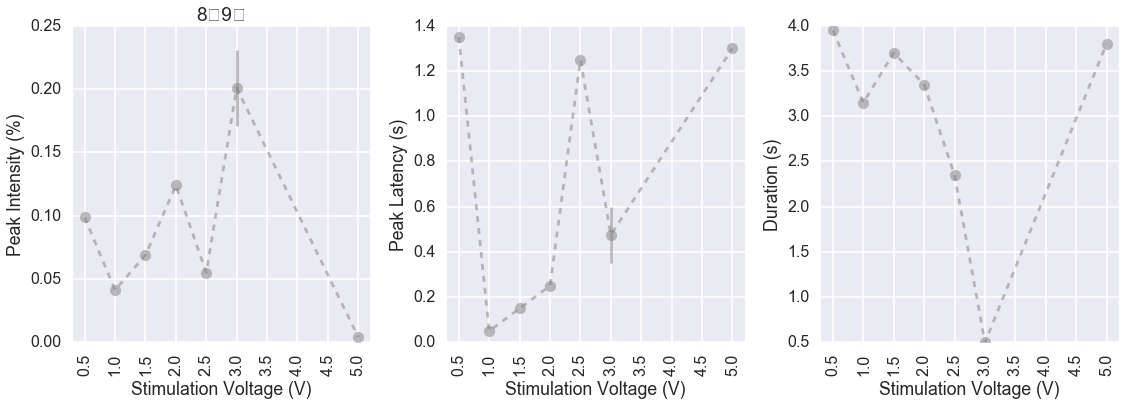

In [6]:
date_list = ["8月9日"]
plt.figure(figsize=(16,6))

for date in date_list:
    tmp = None
    tmp = AAFremoved[AAFremoved["date"]==date]
    
    plt.subplot(131)
    tmp_MaxResponse_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["Max Response (%)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_MaxResponse_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_MaxResponse_f.std()/np.sqrt(tmp_MaxResponse_f.count()))

    plt.subplot(132)
    tmp_latency_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["Peak Latency (s)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_latency_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_latency_f.std()/np.sqrt(tmp_latency_f.count()))

    plt.subplot(133)
    tmp_duration_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["duration (s)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_duration_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_duration_f.std()/np.sqrt(tmp_duration_f.count()))


plt.subplot(131)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Intensity (%)")
plt.title(date)

plt.subplot(132)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Latency (s)")

plt.subplot(133)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Duration (s)")

plt.tight_layout()

plt.savefig("merged-checked-repaired-0809-v01-8f50.png", dpi=300)

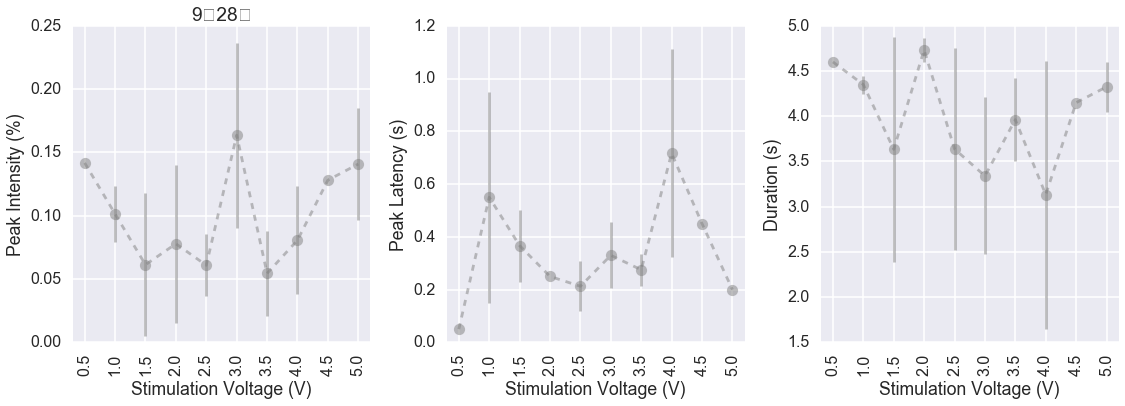

In [7]:
date_list = ["9月28日"]
plt.figure(figsize=(16,6))

for date in date_list:
    tmp = None
    tmp = AAFremoved[AAFremoved["date"]==date]
    
    plt.subplot(131)
    tmp_MaxResponse_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["Max Response (%)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_MaxResponse_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_MaxResponse_f.std()/np.sqrt(tmp_MaxResponse_f.count()))

    plt.subplot(132)
    tmp_latency_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["Peak Latency (s)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_latency_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_latency_f.std()/np.sqrt(tmp_latency_f.count()))

    plt.subplot(133)
    tmp_duration_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["duration (s)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_duration_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_duration_f.std()/np.sqrt(tmp_duration_f.count()))


plt.subplot(131)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Intensity (%)")
plt.title(date)

plt.subplot(132)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Latency (s)")

plt.subplot(133)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Duration (s)")

plt.tight_layout()

plt.savefig("merged-checked-repaired-0928-v01-8f50.png", dpi=300)

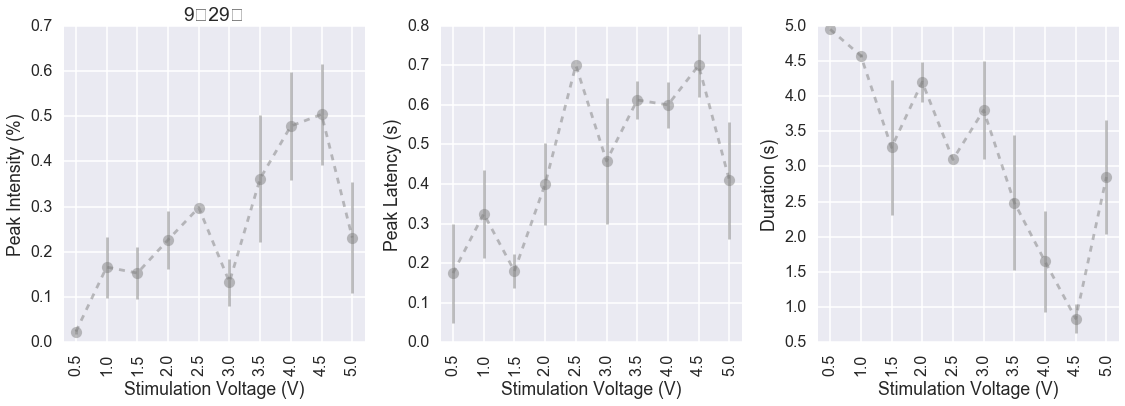

In [8]:
date_list = ["9月29日"]
plt.figure(figsize=(16,6))

for date in date_list:
    tmp = None
    tmp = AAFremoved[AAFremoved["date"]==date]
    
    plt.subplot(131)
    tmp_MaxResponse_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["Max Response (%)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_MaxResponse_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_MaxResponse_f.std()/np.sqrt(tmp_MaxResponse_f.count()))

    plt.subplot(132)
    tmp_latency_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["Peak Latency (s)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_latency_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_latency_f.std()/np.sqrt(tmp_latency_f.count()))

    plt.subplot(133)
    tmp_duration_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["duration (s)"].groupby(tmp["Stimulation Voltage (V)"])
    tmp_duration_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--", yerr=tmp_duration_f.std()/np.sqrt(tmp_duration_f.count()))


plt.subplot(131)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Intensity (%)")
plt.title(date)

plt.subplot(132)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak Latency (s)")

plt.subplot(133)
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Duration (s)")

plt.tight_layout()

plt.savefig("merged-checked-repaired-0929-v01-8f50.png", dpi=300)